0. input

0. input

In [40]:
model_site  = ["12305000","12322000"
              ,"13092747","13150430","13154500","13176400","13190500","13192200","13211205","13213000","13296000","13304050","13307000","13310800","13310850","13311000","13311250","13311450","13317660","13337095","13340000","13340600","13341050","13342500"
              ]

In [41]:
#output
#ws_charateristics_csv = "ws_charateristics.csv"

In [42]:
# Add these lines to mount your Google Drive
try:
    from google.colab import drive
    drive.mount('/content/drive')
    print("Google Drive mounted successfully.")
except ImportError:
    print("Google Colab environment not detected. Skipping Google Drive mount.")
except Exception as e:
    print(f"Error mounting Google Drive: {e}")

Mounted at /content/drive
Google Drive mounted successfully.


In [43]:
#!conda install -y conda-forge::srtm.py
!pip install SRTM.py
import srtm
!pip install dataretrieval
from dataretrieval import nwis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
current_time = datetime.now()
print(current_time.strftime("%Y-%m-%d %H:%M:%S"))

2025-06-14 17:54:32


use nwis to get model site info

In [44]:
site_info = nwis.get_info(sites= model_site )
site_info_df = pd.DataFrame( site_info[0] )
site_info_df["site_no"]=site_info_df["site_no"].astype(str)
columns_to_save = ['site_no', 'dec_lat_va', 'dec_long_va', 'drain_area_va'
                   ,   'alt_va'
                  ]
filtered_df = site_info_df[columns_to_save]
print(filtered_df)

     site_no  dec_lat_va  dec_long_va  drain_area_va   alt_va
0   12305000   48.616883  -116.049194        11740.0  1794.75
1   12322000   48.996389  -116.507500        13700.0  1700.00
2   13092747   42.562500  -114.494722          259.0  3630.00
3   13150430   43.323361  -114.108350           70.0  4834.45
4   13154500   43.002222  -115.202500        35800.0  2495.13
5   13176400   42.261369  -116.868442         2140.0  4253.65
6   13190500   43.343611  -115.477500          978.0  3833.07
7   13192200   43.550556  -115.721944         1172.0      NaN
8   13211205   43.677353  -116.701131         3363.0  2337.11
9   13213000   43.781667  -116.972778         3906.0  2199.46
10  13296000   44.278889  -114.733889          189.0  5950.00
11  13304050   44.688792  -113.370406            NaN  5938.25
12  13307000   45.322500  -114.440000         6239.0  3157.59
13  13310800   44.902250  -115.325667            NaN  6546.00
14  13310850   44.889528  -115.360222            NaN  6639.00
15  1331

13341050
https://waterdata.usgs.gov/id/nwis/wys_rpt/?site_no=13341050&agency_cd=USGS
5 mi downstream from Dworshak Dam
https://www.nww.usace.army.mil/Media/News-Releases/Article/3824182/dworshak-dam-to-increase-releases-beginning-july-1st/


In [45]:
#filtered_df['dam_upstream'] == " "

filtered_df.loc[filtered_df['site_no'] == "13341050", 'dam_regulation'] = "Dworshak"

print(filtered_df)

     site_no  dec_lat_va  dec_long_va  drain_area_va   alt_va dam_regulation
0   12305000   48.616883  -116.049194        11740.0  1794.75            NaN
1   12322000   48.996389  -116.507500        13700.0  1700.00            NaN
2   13092747   42.562500  -114.494722          259.0  3630.00            NaN
3   13150430   43.323361  -114.108350           70.0  4834.45            NaN
4   13154500   43.002222  -115.202500        35800.0  2495.13            NaN
5   13176400   42.261369  -116.868442         2140.0  4253.65            NaN
6   13190500   43.343611  -115.477500          978.0  3833.07            NaN
7   13192200   43.550556  -115.721944         1172.0      NaN            NaN
8   13211205   43.677353  -116.701131         3363.0  2337.11            NaN
9   13213000   43.781667  -116.972778         3906.0  2199.46            NaN
10  13296000   44.278889  -114.733889          189.0  5950.00            NaN
11  13304050   44.688792  -113.370406            NaN  5938.25            NaN

<ipython-input-45-1739110606>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.loc[filtered_df['site_no'] == "13341050", 'dam_regulation'] = "Dworshak"


13304050
https://waterdata.usgs.gov/id/nwis/wys_rpt/?site_no=13304050&agency_cd=USGS
DRAINAGE AREA - 81.3 mi2
Discharge affected to unknown degree by regulation or diversion.

In [46]:
filtered_df.loc[filtered_df['site_no'] == "13304050", 'drain_area_va'] =  81.3

filtered_df.loc[filtered_df['site_no'] == "13304050", 'upstream_diversion'] = "unknown degree by regulation or diversion"

print(filtered_df)

     site_no  dec_lat_va  dec_long_va  drain_area_va   alt_va dam_regulation  \
0   12305000   48.616883  -116.049194        11740.0  1794.75            NaN   
1   12322000   48.996389  -116.507500        13700.0  1700.00            NaN   
2   13092747   42.562500  -114.494722          259.0  3630.00            NaN   
3   13150430   43.323361  -114.108350           70.0  4834.45            NaN   
4   13154500   43.002222  -115.202500        35800.0  2495.13            NaN   
5   13176400   42.261369  -116.868442         2140.0  4253.65            NaN   
6   13190500   43.343611  -115.477500          978.0  3833.07            NaN   
7   13192200   43.550556  -115.721944         1172.0      NaN            NaN   
8   13211205   43.677353  -116.701131         3363.0  2337.11            NaN   
9   13213000   43.781667  -116.972778         3906.0  2199.46            NaN   
10  13296000   44.278889  -114.733889          189.0  5950.00            NaN   
11  13304050   44.688792  -113.370406   

<ipython-input-46-3012525551>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.loc[filtered_df['site_no'] == "13304050", 'upstream_diversion'] = "unknown degree by regulation or diversion"


13150430
https://waterdata.usgs.gov/id/nwis/wys_rpt/?site_no=13150430&agency_cd=USGS
REMARKS - Several diversions above station for irrigation.

In [47]:
#filtered_df['upstream_diversion'] == " "

filtered_df.loc[filtered_df['site_no'] == "13150430", 'upstream_diversion'] = "Irrigation"

print(filtered_df)


     site_no  dec_lat_va  dec_long_va  drain_area_va   alt_va dam_regulation  \
0   12305000   48.616883  -116.049194        11740.0  1794.75            NaN   
1   12322000   48.996389  -116.507500        13700.0  1700.00            NaN   
2   13092747   42.562500  -114.494722          259.0  3630.00            NaN   
3   13150430   43.323361  -114.108350           70.0  4834.45            NaN   
4   13154500   43.002222  -115.202500        35800.0  2495.13            NaN   
5   13176400   42.261369  -116.868442         2140.0  4253.65            NaN   
6   13190500   43.343611  -115.477500          978.0  3833.07            NaN   
7   13192200   43.550556  -115.721944         1172.0      NaN            NaN   
8   13211205   43.677353  -116.701131         3363.0  2337.11            NaN   
9   13213000   43.781667  -116.972778         3906.0  2199.46            NaN   
10  13296000   44.278889  -114.733889          189.0  5950.00            NaN   
11  13304050   44.688792  -113.370406   

13310800
https://waterdata.usgs.gov/id/nwis/wys_rpt/?site_no=13310800&agency_cd=USGS
DRAINAGE AREA - 9.1 mi².

In [48]:

filtered_df.loc[filtered_df['site_no'] == "13310800", 'drain_area_va'] =  9.1

print(filtered_df)

     site_no  dec_lat_va  dec_long_va  drain_area_va   alt_va dam_regulation  \
0   12305000   48.616883  -116.049194        11740.0  1794.75            NaN   
1   12322000   48.996389  -116.507500        13700.0  1700.00            NaN   
2   13092747   42.562500  -114.494722          259.0  3630.00            NaN   
3   13150430   43.323361  -114.108350           70.0  4834.45            NaN   
4   13154500   43.002222  -115.202500        35800.0  2495.13            NaN   
5   13176400   42.261369  -116.868442         2140.0  4253.65            NaN   
6   13190500   43.343611  -115.477500          978.0  3833.07            NaN   
7   13192200   43.550556  -115.721944         1172.0      NaN            NaN   
8   13211205   43.677353  -116.701131         3363.0  2337.11            NaN   
9   13213000   43.781667  -116.972778         3906.0  2199.46            NaN   
10  13296000   44.278889  -114.733889          189.0  5950.00            NaN   
11  13304050   44.688792  -113.370406   

13310850

https://waterdata.usgs.gov/id/nwis/wys_rpt/?site_no=13310850&agency_cd=USGS

DRAINAGE AREA - 5.7 mi².



In [49]:



filtered_df.loc[filtered_df['site_no'] == "13310850", 'drain_area_va'] =  5.7

print(filtered_df)

     site_no  dec_lat_va  dec_long_va  drain_area_va   alt_va dam_regulation  \
0   12305000   48.616883  -116.049194        11740.0  1794.75            NaN   
1   12322000   48.996389  -116.507500        13700.0  1700.00            NaN   
2   13092747   42.562500  -114.494722          259.0  3630.00            NaN   
3   13150430   43.323361  -114.108350           70.0  4834.45            NaN   
4   13154500   43.002222  -115.202500        35800.0  2495.13            NaN   
5   13176400   42.261369  -116.868442         2140.0  4253.65            NaN   
6   13190500   43.343611  -115.477500          978.0  3833.07            NaN   
7   13192200   43.550556  -115.721944         1172.0      NaN            NaN   
8   13211205   43.677353  -116.701131         3363.0  2337.11            NaN   
9   13213000   43.781667  -116.972778         3906.0  2199.46            NaN   
10  13296000   44.278889  -114.733889          189.0  5950.00            NaN   
11  13304050   44.688792  -113.370406   

13337095

https://waterdata.usgs.gov/id/nwis/dv/?site_no=13337095&PARAmeter_cd=00060


In [50]:
filtered_df.loc[filtered_df['site_no'] == "13337095", 'comment'] =   "no Q data"

print(filtered_df)

     site_no  dec_lat_va  dec_long_va  drain_area_va   alt_va dam_regulation  \
0   12305000   48.616883  -116.049194        11740.0  1794.75            NaN   
1   12322000   48.996389  -116.507500        13700.0  1700.00            NaN   
2   13092747   42.562500  -114.494722          259.0  3630.00            NaN   
3   13150430   43.323361  -114.108350           70.0  4834.45            NaN   
4   13154500   43.002222  -115.202500        35800.0  2495.13            NaN   
5   13176400   42.261369  -116.868442         2140.0  4253.65            NaN   
6   13190500   43.343611  -115.477500          978.0  3833.07            NaN   
7   13192200   43.550556  -115.721944         1172.0      NaN            NaN   
8   13211205   43.677353  -116.701131         3363.0  2337.11            NaN   
9   13213000   43.781667  -116.972778         3906.0  2199.46            NaN   
10  13296000   44.278889  -114.733889          189.0  5950.00            NaN   
11  13304050   44.688792  -113.370406   

<ipython-input-50-3992196447>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.loc[filtered_df['site_no'] == "13337095", 'comment'] =   "no Q data"


In [51]:



#def get_elevation(lat, lon):
#    elevation_data = srtm.get_data()
#    return elevation_data.get_elevation(lat, lon)

def get_elevation(lat, lon):
    elevation_data = srtm.get_data()
    elevation_data_meter = elevation_data.get_elevation(lat, lon)
    elevation =3.28084* elevation_data_meter
    return elevation

# Apply the elevation function to each row
filtered_df['elevation'] = filtered_df.apply(
    lambda row: get_elevation(row['dec_lat_va'], row['dec_long_va']), axis=1
)

# Print the resulting DataFrame
print(filtered_df)

     site_no  dec_lat_va  dec_long_va  drain_area_va   alt_va dam_regulation  \
0   12305000   48.616883  -116.049194        11740.0  1794.75            NaN   
1   12322000   48.996389  -116.507500        13700.0  1700.00            NaN   
2   13092747   42.562500  -114.494722          259.0  3630.00            NaN   
3   13150430   43.323361  -114.108350           70.0  4834.45            NaN   
4   13154500   43.002222  -115.202500        35800.0  2495.13            NaN   
5   13176400   42.261369  -116.868442         2140.0  4253.65            NaN   
6   13190500   43.343611  -115.477500          978.0  3833.07            NaN   
7   13192200   43.550556  -115.721944         1172.0      NaN            NaN   
8   13211205   43.677353  -116.701131         3363.0  2337.11            NaN   
9   13213000   43.781667  -116.972778         3906.0  2199.46            NaN   
10  13296000   44.278889  -114.733889          189.0  5950.00            NaN   
11  13304050   44.688792  -113.370406   

<ipython-input-51-2790580689>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['elevation'] = filtered_df.apply(


13192200

Flow regulated by Anderson Ranch Reservior (see station 13190000).


In [52]:
filtered_df.loc[filtered_df['site_no'] == "13192200", 'dam_regulation'] = "Anderson Ranch Reservior"

filtered_df.loc[filtered_df['site_no'] == "13192200", 'alt_va'] = filtered_df.loc[filtered_df['site_no'] == "13192200" ]["elevation"]

print(filtered_df)

     site_no  dec_lat_va  dec_long_va  drain_area_va      alt_va  \
0   12305000   48.616883  -116.049194        11740.0  1794.75000   
1   12322000   48.996389  -116.507500        13700.0  1700.00000   
2   13092747   42.562500  -114.494722          259.0  3630.00000   
3   13150430   43.323361  -114.108350           70.0  4834.45000   
4   13154500   43.002222  -115.202500        35800.0  2495.13000   
5   13176400   42.261369  -116.868442         2140.0  4253.65000   
6   13190500   43.343611  -115.477500          978.0  3833.07000   
7   13192200   43.550556  -115.721944         1172.0  3323.49092   
8   13211205   43.677353  -116.701131         3363.0  2337.11000   
9   13213000   43.781667  -116.972778         3906.0  2199.46000   
10  13296000   44.278889  -114.733889          189.0  5950.00000   
11  13304050   44.688792  -113.370406           81.3  5938.25000   
12  13307000   45.322500  -114.440000         6239.0  3157.59000   
13  13310800   44.902250  -115.325667           

13311250

https://waterdata.usgs.gov/id/nwis/wys_rpt/?site_no=13311250&agency_cd=USGS

DRAINAGE AREA - 24.1 mi².

In [53]:
filtered_df.loc[filtered_df['site_no'] == "13311250", 'drain_area_va'] = 24.1

filtered_df.loc[filtered_df['site_no'] == "13311250", 'comment'] = "no USGS remark"

print(filtered_df)

     site_no  dec_lat_va  dec_long_va  drain_area_va      alt_va  \
0   12305000   48.616883  -116.049194        11740.0  1794.75000   
1   12322000   48.996389  -116.507500        13700.0  1700.00000   
2   13092747   42.562500  -114.494722          259.0  3630.00000   
3   13150430   43.323361  -114.108350           70.0  4834.45000   
4   13154500   43.002222  -115.202500        35800.0  2495.13000   
5   13176400   42.261369  -116.868442         2140.0  4253.65000   
6   13190500   43.343611  -115.477500          978.0  3833.07000   
7   13192200   43.550556  -115.721944         1172.0  3323.49092   
8   13211205   43.677353  -116.701131         3363.0  2337.11000   
9   13213000   43.781667  -116.972778         3906.0  2199.46000   
10  13296000   44.278889  -114.733889          189.0  5950.00000   
11  13304050   44.688792  -113.370406           81.3  5938.25000   
12  13307000   45.322500  -114.440000         6239.0  3157.59000   
13  13310800   44.902250  -115.325667           

13311450

https://waterdata.usgs.gov/id/nwis/wys_rpt/?site_no=13311450&agency_cd=USGS

DRAINAGE AREA - 17.9 mi².


In [54]:
filtered_df.loc[filtered_df['site_no'] == "13311450", 'drain_area_va'] = 17.9


print(filtered_df)

     site_no  dec_lat_va  dec_long_va  drain_area_va      alt_va  \
0   12305000   48.616883  -116.049194        11740.0  1794.75000   
1   12322000   48.996389  -116.507500        13700.0  1700.00000   
2   13092747   42.562500  -114.494722          259.0  3630.00000   
3   13150430   43.323361  -114.108350           70.0  4834.45000   
4   13154500   43.002222  -115.202500        35800.0  2495.13000   
5   13176400   42.261369  -116.868442         2140.0  4253.65000   
6   13190500   43.343611  -115.477500          978.0  3833.07000   
7   13192200   43.550556  -115.721944         1172.0  3323.49092   
8   13211205   43.677353  -116.701131         3363.0  2337.11000   
9   13213000   43.781667  -116.972778         3906.0  2199.46000   
10  13296000   44.278889  -114.733889          189.0  5950.00000   
11  13304050   44.688792  -113.370406           81.3  5938.25000   
12  13307000   45.322500  -114.440000         6239.0  3157.59000   
13  13310800   44.902250  -115.325667           

13317660

https://waterdata.usgs.gov/id/nwis/wys_rpt/?site_no=13317660&agency_cd=USGS

DRAINAGE AREA - 88,990 mi²

Diversions upstream from station for irrigation of about 4,090,000 acres, of which about 750,000 acres are irrigated by withdrawals from ground water.

Flow regulated by many reservoirs upstream from station with a total usable capacity of more than 10,000,000 acre-ft, the most effective of which is Brownlee Reservoir located 109.5 mi upstream. Diurnal fluctuations caused by Hells Canyon Dam powerplant. U.S. Geological Survey satellite telemeter at station.


In [55]:
filtered_df.loc[filtered_df['site_no'] == "13317660", 'drain_area_va'] = 88990

filtered_df.loc[filtered_df['site_no'] == "13317660", 'upstream_diversion'] = "Irrigation"

filtered_df.loc[filtered_df['site_no'] == "13317660", 'dam_regulation'] = "Brownlee Reservoir, Hells Canyon Dam, etc"

print(filtered_df)

     site_no  dec_lat_va  dec_long_va  drain_area_va      alt_va  \
0   12305000   48.616883  -116.049194        11740.0  1794.75000   
1   12322000   48.996389  -116.507500        13700.0  1700.00000   
2   13092747   42.562500  -114.494722          259.0  3630.00000   
3   13150430   43.323361  -114.108350           70.0  4834.45000   
4   13154500   43.002222  -115.202500        35800.0  2495.13000   
5   13176400   42.261369  -116.868442         2140.0  4253.65000   
6   13190500   43.343611  -115.477500          978.0  3833.07000   
7   13192200   43.550556  -115.721944         1172.0  3323.49092   
8   13211205   43.677353  -116.701131         3363.0  2337.11000   
9   13213000   43.781667  -116.972778         3906.0  2199.46000   
10  13296000   44.278889  -114.733889          189.0  5950.00000   
11  13304050   44.688792  -113.370406           81.3  5938.25000   
12  13307000   45.322500  -114.440000         6239.0  3157.59000   
13  13310800   44.902250  -115.325667           

12322000

https://waterdata.usgs.gov/id/nwis/wys_rpt/?site_no=12322000&agency_cd=USGS

Boundary dike of Reclamation Farm and U.S. Forest Service roadway dike (south side of Boundary Creek) remained intact and flow of river was confined throughout year to main channel on which gage is located. Elevations affected by backwater from Kootenay Lake. Flow regulated by Libby Dam started on Mar. 21, 1972.


In [56]:
filtered_df.loc[filtered_df['site_no'] == "12322000", 'dike_regulation'] = "Boundary dike of Reclamation Farm and U.S. Forest Service roadway dike"

filtered_df.loc[filtered_df['site_no'] == "12322000", 'dam_regulation'] = "Kootenay Lake and Libby Dam"

filtered_df


<ipython-input-56-2887330606>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.loc[filtered_df['site_no'] == "12322000", 'dike_regulation'] = "Boundary dike of Reclamation Farm and U.S. Forest Service roadway dike"


,site_no,dec_lat_va,dec_long_va,drain_area_va,alt_va,dam_regulation,upstream_diversion,comment,elevation,dike_regulation
0,12305000,48.616883,-116.049194,11740.0,1794.75000,NaN,NaN,NaN,1840.55124,NaN
1,12322000,48.996389,-116.507500,13700.0,1700.00000,Kootenay Lake and Libby Dam,NaN,NaN,1748.68772,Boundary dike of Reclamation Farm and U.S. For...
2,13092747,42.562500,-114.494722,259.0,3630.00000,NaN,NaN,NaN,3628.60904,NaN
3,13150430,43.323361,-114.108350,70.0,4834.45000,NaN,Irrigation,NaN,4849.08152,NaN
4,13154500,43.002222,-115.202500,35800.0,2495.13000,NaN,NaN,NaN,2513.12344,NaN
5,13176400,42.261369,-116.868442,2140.0,4253.65000,NaN,NaN,NaN,4294.61956,NaN
6,13190500,43.343611,-115.477500,978.0,3833.07000,NaN,NaN,NaN,3877.95288,NaN
7,13192200,43.550556,-115.721944,1172.0,3323.49092,Anderson Ranch Reservior,NaN,NaN,3323.49092,NaN
8,13211205,43.677353,-116.701131,3363.0,2337.11000,NaN,NaN,NaN,2345.80060,NaN
9,13213000,43.781667,-116.972778,3906.0,2199.46000,NaN,NaN,NaN,2211.28616,NaN


13154500

https://waterdata.usgs.gov/id/nwis/wys_rpt/?site_no=13154500&agency_cd=USGS

Flow regulated by American Falls Reservoir, 168.4 mi upstream and irrigation diversions at Milner Dam. Diurnal fluctuation caused by hydroelectric power plant near Bliss. At times, practically entire flow is diverted at Milner during irrigation seasons; only minor diversions below Milner; flow at King Hill is then derived largely from springs and seepage entering below Milner within the Twin Falls tract. Diversions above station for irrigation of about 2,450,000 acres, of which about 675,000 acres are irrigated by withdrawals from ground water (1966 determination). Inflow from Clover Creek (station 13154400) may be significant during snowmelt runoff periods some years.


In [57]:
filtered_df.loc[filtered_df['site_no'] == "13154500", 'dam_regulation'] = "American Falls Reservoir"

filtered_df.loc[filtered_df['site_no'] == "13154500", 'upstream_diversion'] = "irrigation diversions at Milner Dam"

filtered_df.loc[filtered_df['site_no'] == "13154500", 'comment'] ="springs and seepage entering below Milner, irrigated by withdrawals from ground water, Inflow from Clover Creek (station 13154400) may be significant during snowmelt runoff periods"

filtered_df

,site_no,dec_lat_va,dec_long_va,drain_area_va,alt_va,dam_regulation,upstream_diversion,comment,elevation,dike_regulation
0,12305000,48.616883,-116.049194,11740.0,1794.75000,NaN,NaN,NaN,1840.55124,NaN
1,12322000,48.996389,-116.507500,13700.0,1700.00000,Kootenay Lake and Libby Dam,NaN,NaN,1748.68772,Boundary dike of Reclamation Farm and U.S. For...
2,13092747,42.562500,-114.494722,259.0,3630.00000,NaN,NaN,NaN,3628.60904,NaN
3,13150430,43.323361,-114.108350,70.0,4834.45000,NaN,Irrigation,NaN,4849.08152,NaN
4,13154500,43.002222,-115.202500,35800.0,2495.13000,American Falls Reservoir,irrigation diversions at Milner Dam,"springs and seepage entering below Milner, irr...",2513.12344,NaN
5,13176400,42.261369,-116.868442,2140.0,4253.65000,NaN,NaN,NaN,4294.61956,NaN
6,13190500,43.343611,-115.477500,978.0,3833.07000,NaN,NaN,NaN,3877.95288,NaN
7,13192200,43.550556,-115.721944,1172.0,3323.49092,Anderson Ranch Reservior,NaN,NaN,3323.49092,NaN
8,13211205,43.677353,-116.701131,3363.0,2337.11000,NaN,NaN,NaN,2345.80060,NaN
9,13213000,43.781667,-116.972778,3906.0,2199.46000,NaN,NaN,NaN,2211.28616,NaN


13213000

https://waterdata.usgs.gov/id/nwis/wys_rpt/?site_no=13213000&agency_cd=USGS

REMARKS - Many canals and small farm laterals divert water for irrigation from the Boise River above this site (see stations 13205995 and 13212996).

In [58]:
#filtered_df.loc[filtered_df['site_no'] == "13213000", 'dam_regulation'] = "American Falls Reservoir"

filtered_df.loc[filtered_df['site_no'] == "13213000", 'upstream_diversion'] = "Many canals and small farm laterals divert water for irrigation from the Boise River above this site"

filtered_df

,site_no,dec_lat_va,dec_long_va,drain_area_va,alt_va,dam_regulation,upstream_diversion,comment,elevation,dike_regulation
0,12305000,48.616883,-116.049194,11740.0,1794.75000,NaN,NaN,NaN,1840.55124,NaN
1,12322000,48.996389,-116.507500,13700.0,1700.00000,Kootenay Lake and Libby Dam,NaN,NaN,1748.68772,Boundary dike of Reclamation Farm and U.S. For...
2,13092747,42.562500,-114.494722,259.0,3630.00000,NaN,NaN,NaN,3628.60904,NaN
3,13150430,43.323361,-114.108350,70.0,4834.45000,NaN,Irrigation,NaN,4849.08152,NaN
4,13154500,43.002222,-115.202500,35800.0,2495.13000,American Falls Reservoir,irrigation diversions at Milner Dam,"springs and seepage entering below Milner, irr...",2513.12344,NaN
5,13176400,42.261369,-116.868442,2140.0,4253.65000,NaN,NaN,NaN,4294.61956,NaN
6,13190500,43.343611,-115.477500,978.0,3833.07000,NaN,NaN,NaN,3877.95288,NaN
7,13192200,43.550556,-115.721944,1172.0,3323.49092,Anderson Ranch Reservior,NaN,NaN,3323.49092,NaN
8,13211205,43.677353,-116.701131,3363.0,2337.11000,NaN,NaN,NaN,2345.80060,NaN
9,13213000,43.781667,-116.972778,3906.0,2199.46000,NaN,Many canals and small farm laterals divert wat...,NaN,2211.28616,NaN


13211205
https://waterdata.usgs.gov/id/nwis/wys_rpt/?site_no=13211205&agency_cd=USGS

In [59]:
filtered_df.loc[filtered_df['site_no'] == "13211205", 'upstream_diversion'] = "Many canals and small farm laterals divert water for irrigation from the Boise River above this site"

filtered_df

,site_no,dec_lat_va,dec_long_va,drain_area_va,alt_va,dam_regulation,upstream_diversion,comment,elevation,dike_regulation
0,12305000,48.616883,-116.049194,11740.0,1794.75000,NaN,NaN,NaN,1840.55124,NaN
1,12322000,48.996389,-116.507500,13700.0,1700.00000,Kootenay Lake and Libby Dam,NaN,NaN,1748.68772,Boundary dike of Reclamation Farm and U.S. For...
2,13092747,42.562500,-114.494722,259.0,3630.00000,NaN,NaN,NaN,3628.60904,NaN
3,13150430,43.323361,-114.108350,70.0,4834.45000,NaN,Irrigation,NaN,4849.08152,NaN
4,13154500,43.002222,-115.202500,35800.0,2495.13000,American Falls Reservoir,irrigation diversions at Milner Dam,"springs and seepage entering below Milner, irr...",2513.12344,NaN
5,13176400,42.261369,-116.868442,2140.0,4253.65000,NaN,NaN,NaN,4294.61956,NaN
6,13190500,43.343611,-115.477500,978.0,3833.07000,NaN,NaN,NaN,3877.95288,NaN
7,13192200,43.550556,-115.721944,1172.0,3323.49092,Anderson Ranch Reservior,NaN,NaN,3323.49092,NaN
8,13211205,43.677353,-116.701131,3363.0,2337.11000,NaN,Many canals and small farm laterals divert wat...,NaN,2345.80060,NaN
9,13213000,43.781667,-116.972778,3906.0,2199.46000,NaN,Many canals and small farm laterals divert wat...,NaN,2211.28616,NaN


13307000

https://waterdata.usgs.gov/id/nwis/wys_rpt/?site_no=13307000&agency_cd=USGS

REMARKS - Diversions above station for irrigation of about 149,000 acres, of which about 1,200 acres are by withdrawals from groundwater (1966 determination).


In [60]:
filtered_df.loc[filtered_df['site_no'] == "13307000", 'upstream_diversion'] = "Diversions above station for irrigation of about 149,000 acres"

filtered_df

,site_no,dec_lat_va,dec_long_va,drain_area_va,alt_va,dam_regulation,upstream_diversion,comment,elevation,dike_regulation
0,12305000,48.616883,-116.049194,11740.0,1794.75000,NaN,NaN,NaN,1840.55124,NaN
1,12322000,48.996389,-116.507500,13700.0,1700.00000,Kootenay Lake and Libby Dam,NaN,NaN,1748.68772,Boundary dike of Reclamation Farm and U.S. For...
2,13092747,42.562500,-114.494722,259.0,3630.00000,NaN,NaN,NaN,3628.60904,NaN
3,13150430,43.323361,-114.108350,70.0,4834.45000,NaN,Irrigation,NaN,4849.08152,NaN
4,13154500,43.002222,-115.202500,35800.0,2495.13000,American Falls Reservoir,irrigation diversions at Milner Dam,"springs and seepage entering below Milner, irr...",2513.12344,NaN
5,13176400,42.261369,-116.868442,2140.0,4253.65000,NaN,NaN,NaN,4294.61956,NaN
6,13190500,43.343611,-115.477500,978.0,3833.07000,NaN,NaN,NaN,3877.95288,NaN
7,13192200,43.550556,-115.721944,1172.0,3323.49092,Anderson Ranch Reservior,NaN,NaN,3323.49092,NaN
8,13211205,43.677353,-116.701131,3363.0,2337.11000,NaN,Many canals and small farm laterals divert wat...,NaN,2345.80060,NaN
9,13213000,43.781667,-116.972778,3906.0,2199.46000,NaN,Many canals and small farm laterals divert wat...,NaN,2211.28616,NaN


12305000

https://waterdata.usgs.gov/id/nwis/wys_rpt/?site_no=12305000&agency_cd=USGS

REMARKS - Flow regulated by Libby Dam and power plant, located about 50.5 river miles upstream, since Mar. 21, 1972.



In [61]:
filtered_df.loc[filtered_df['site_no'] == "12305000", 'dam_regulation'] = "Libby Dam and power plant, located about 50.5 river miles upstream"

filtered_df

,site_no,dec_lat_va,dec_long_va,drain_area_va,alt_va,dam_regulation,upstream_diversion,comment,elevation,dike_regulation
0,12305000,48.616883,-116.049194,11740.0,1794.75000,"Libby Dam and power plant, located about 50.5 ...",NaN,NaN,1840.55124,NaN
1,12322000,48.996389,-116.507500,13700.0,1700.00000,Kootenay Lake and Libby Dam,NaN,NaN,1748.68772,Boundary dike of Reclamation Farm and U.S. For...
2,13092747,42.562500,-114.494722,259.0,3630.00000,NaN,NaN,NaN,3628.60904,NaN
3,13150430,43.323361,-114.108350,70.0,4834.45000,NaN,Irrigation,NaN,4849.08152,NaN
4,13154500,43.002222,-115.202500,35800.0,2495.13000,American Falls Reservoir,irrigation diversions at Milner Dam,"springs and seepage entering below Milner, irr...",2513.12344,NaN
5,13176400,42.261369,-116.868442,2140.0,4253.65000,NaN,NaN,NaN,4294.61956,NaN
6,13190500,43.343611,-115.477500,978.0,3833.07000,NaN,NaN,NaN,3877.95288,NaN
7,13192200,43.550556,-115.721944,1172.0,3323.49092,Anderson Ranch Reservior,NaN,NaN,3323.49092,NaN
8,13211205,43.677353,-116.701131,3363.0,2337.11000,NaN,Many canals and small farm laterals divert wat...,NaN,2345.80060,NaN
9,13213000,43.781667,-116.972778,3906.0,2199.46000,NaN,Many canals and small farm laterals divert wat...,NaN,2211.28616,NaN


13092747

https://waterdata.usgs.gov/id/nwis/wys_rpt/?site_no=13092747&agency_cd=USGS


In [62]:
filtered_df.loc[filtered_df['site_no'] == "13092747", 'upstream_diversion'] = "Flow partially regulated by many diversions upstream for irrigation and irrigation-return flows."

filtered_df

,site_no,dec_lat_va,dec_long_va,drain_area_va,alt_va,dam_regulation,upstream_diversion,comment,elevation,dike_regulation
0,12305000,48.616883,-116.049194,11740.0,1794.75000,"Libby Dam and power plant, located about 50.5 ...",NaN,NaN,1840.55124,NaN
1,12322000,48.996389,-116.507500,13700.0,1700.00000,Kootenay Lake and Libby Dam,NaN,NaN,1748.68772,Boundary dike of Reclamation Farm and U.S. For...
2,13092747,42.562500,-114.494722,259.0,3630.00000,NaN,Flow partially regulated by many diversions up...,NaN,3628.60904,NaN
3,13150430,43.323361,-114.108350,70.0,4834.45000,NaN,Irrigation,NaN,4849.08152,NaN
4,13154500,43.002222,-115.202500,35800.0,2495.13000,American Falls Reservoir,irrigation diversions at Milner Dam,"springs and seepage entering below Milner, irr...",2513.12344,NaN
5,13176400,42.261369,-116.868442,2140.0,4253.65000,NaN,NaN,NaN,4294.61956,NaN
6,13190500,43.343611,-115.477500,978.0,3833.07000,NaN,NaN,NaN,3877.95288,NaN
7,13192200,43.550556,-115.721944,1172.0,3323.49092,Anderson Ranch Reservior,NaN,NaN,3323.49092,NaN
8,13211205,43.677353,-116.701131,3363.0,2337.11000,NaN,Many canals and small farm laterals divert wat...,NaN,2345.80060,NaN
9,13213000,43.781667,-116.972778,3906.0,2199.46000,NaN,Many canals and small farm laterals divert wat...,NaN,2211.28616,NaN


13342500

Diversions above station for irrigation of about 1,630 acres (1966 determination). Regulation of the North Fork Clearwater River at Ahsahka began on Sept. 27, 1971, when diversion tunnel at Dworshak Dam was closed.

In [63]:
filtered_df.loc[filtered_df['site_no'] == "13342500", 'upstream_diversion'] = "Diversions above station for irrigation of about 1,630 acres."

filtered_df.loc[filtered_df['site_no'] == "13342500", 'dam_regulation'] = "Dworshak Dam from  North Fork Clearwater River"

filtered_df

,site_no,dec_lat_va,dec_long_va,drain_area_va,alt_va,dam_regulation,upstream_diversion,comment,elevation,dike_regulation
0,12305000,48.616883,-116.049194,11740.0,1794.75000,"Libby Dam and power plant, located about 50.5 ...",NaN,NaN,1840.55124,NaN
1,12322000,48.996389,-116.507500,13700.0,1700.00000,Kootenay Lake and Libby Dam,NaN,NaN,1748.68772,Boundary dike of Reclamation Farm and U.S. For...
2,13092747,42.562500,-114.494722,259.0,3630.00000,NaN,Flow partially regulated by many diversions up...,NaN,3628.60904,NaN
3,13150430,43.323361,-114.108350,70.0,4834.45000,NaN,Irrigation,NaN,4849.08152,NaN
4,13154500,43.002222,-115.202500,35800.0,2495.13000,American Falls Reservoir,irrigation diversions at Milner Dam,"springs and seepage entering below Milner, irr...",2513.12344,NaN
5,13176400,42.261369,-116.868442,2140.0,4253.65000,NaN,NaN,NaN,4294.61956,NaN
6,13190500,43.343611,-115.477500,978.0,3833.07000,NaN,NaN,NaN,3877.95288,NaN
7,13192200,43.550556,-115.721944,1172.0,3323.49092,Anderson Ranch Reservior,NaN,NaN,3323.49092,NaN
8,13211205,43.677353,-116.701131,3363.0,2337.11000,NaN,Many canals and small farm laterals divert wat...,NaN,2345.80060,NaN
9,13213000,43.781667,-116.972778,3906.0,2199.46000,NaN,Many canals and small farm laterals divert wat...,NaN,2211.28616,NaN


13340000
https://waterdata.usgs.gov/id/nwis/wys_rpt/?site_no=13340000&agency_cd=USGS
no USGS remark
no dam: https://www.mdpi.com/2073-4441/14/7/1032

In [64]:
filtered_df.loc[filtered_df['site_no'] == "13340000", 'comment'] = "no USGS remark"

filtered_df

,site_no,dec_lat_va,dec_long_va,drain_area_va,alt_va,dam_regulation,upstream_diversion,comment,elevation,dike_regulation
0,12305000,48.616883,-116.049194,11740.0,1794.75000,"Libby Dam and power plant, located about 50.5 ...",NaN,NaN,1840.55124,NaN
1,12322000,48.996389,-116.507500,13700.0,1700.00000,Kootenay Lake and Libby Dam,NaN,NaN,1748.68772,Boundary dike of Reclamation Farm and U.S. For...
2,13092747,42.562500,-114.494722,259.0,3630.00000,NaN,Flow partially regulated by many diversions up...,NaN,3628.60904,NaN
3,13150430,43.323361,-114.108350,70.0,4834.45000,NaN,Irrigation,NaN,4849.08152,NaN
4,13154500,43.002222,-115.202500,35800.0,2495.13000,American Falls Reservoir,irrigation diversions at Milner Dam,"springs and seepage entering below Milner, irr...",2513.12344,NaN
5,13176400,42.261369,-116.868442,2140.0,4253.65000,NaN,NaN,NaN,4294.61956,NaN
6,13190500,43.343611,-115.477500,978.0,3833.07000,NaN,NaN,NaN,3877.95288,NaN
7,13192200,43.550556,-115.721944,1172.0,3323.49092,Anderson Ranch Reservior,NaN,NaN,3323.49092,NaN
8,13211205,43.677353,-116.701131,3363.0,2337.11000,NaN,Many canals and small farm laterals divert wat...,NaN,2345.80060,NaN
9,13213000,43.781667,-116.972778,3906.0,2199.46000,NaN,Many canals and small farm laterals divert wat...,NaN,2211.28616,NaN


In [65]:


filtered_df.loc[filtered_df['site_no'] == "13176400", 'comment'] = "no USGS remark"

filtered_df

,site_no,dec_lat_va,dec_long_va,drain_area_va,alt_va,dam_regulation,upstream_diversion,comment,elevation,dike_regulation
0,12305000,48.616883,-116.049194,11740.0,1794.75000,"Libby Dam and power plant, located about 50.5 ...",NaN,NaN,1840.55124,NaN
1,12322000,48.996389,-116.507500,13700.0,1700.00000,Kootenay Lake and Libby Dam,NaN,NaN,1748.68772,Boundary dike of Reclamation Farm and U.S. For...
2,13092747,42.562500,-114.494722,259.0,3630.00000,NaN,Flow partially regulated by many diversions up...,NaN,3628.60904,NaN
3,13150430,43.323361,-114.108350,70.0,4834.45000,NaN,Irrigation,NaN,4849.08152,NaN
4,13154500,43.002222,-115.202500,35800.0,2495.13000,American Falls Reservoir,irrigation diversions at Milner Dam,"springs and seepage entering below Milner, irr...",2513.12344,NaN
5,13176400,42.261369,-116.868442,2140.0,4253.65000,NaN,NaN,no USGS remark,4294.61956,NaN
6,13190500,43.343611,-115.477500,978.0,3833.07000,NaN,NaN,NaN,3877.95288,NaN
7,13192200,43.550556,-115.721944,1172.0,3323.49092,Anderson Ranch Reservior,NaN,NaN,3323.49092,NaN
8,13211205,43.677353,-116.701131,3363.0,2337.11000,NaN,Many canals and small farm laterals divert wat...,NaN,2345.80060,NaN
9,13213000,43.781667,-116.972778,3906.0,2199.46000,NaN,Many canals and small farm laterals divert wat...,NaN,2211.28616,NaN


In [66]:



filtered_df.loc[filtered_df['site_no'] == "13340600", 'comment'] = "no USGS remark"

filtered_df


,site_no,dec_lat_va,dec_long_va,drain_area_va,alt_va,dam_regulation,upstream_diversion,comment,elevation,dike_regulation
0,12305000,48.616883,-116.049194,11740.0,1794.75000,"Libby Dam and power plant, located about 50.5 ...",NaN,NaN,1840.55124,NaN
1,12322000,48.996389,-116.507500,13700.0,1700.00000,Kootenay Lake and Libby Dam,NaN,NaN,1748.68772,Boundary dike of Reclamation Farm and U.S. For...
2,13092747,42.562500,-114.494722,259.0,3630.00000,NaN,Flow partially regulated by many diversions up...,NaN,3628.60904,NaN
3,13150430,43.323361,-114.108350,70.0,4834.45000,NaN,Irrigation,NaN,4849.08152,NaN
4,13154500,43.002222,-115.202500,35800.0,2495.13000,American Falls Reservoir,irrigation diversions at Milner Dam,"springs and seepage entering below Milner, irr...",2513.12344,NaN
5,13176400,42.261369,-116.868442,2140.0,4253.65000,NaN,NaN,no USGS remark,4294.61956,NaN
6,13190500,43.343611,-115.477500,978.0,3833.07000,NaN,NaN,NaN,3877.95288,NaN
7,13192200,43.550556,-115.721944,1172.0,3323.49092,Anderson Ranch Reservior,NaN,NaN,3323.49092,NaN
8,13211205,43.677353,-116.701131,3363.0,2337.11000,NaN,Many canals and small farm laterals divert wat...,NaN,2345.80060,NaN
9,13213000,43.781667,-116.972778,3906.0,2199.46000,NaN,Many canals and small farm laterals divert wat...,NaN,2211.28616,NaN


In [67]:



filtered_df.loc[filtered_df['site_no'] == "13310850", 'comment'] = "no USGS remark"

filtered_df


,site_no,dec_lat_va,dec_long_va,drain_area_va,alt_va,dam_regulation,upstream_diversion,comment,elevation,dike_regulation
0,12305000,48.616883,-116.049194,11740.0,1794.75000,"Libby Dam and power plant, located about 50.5 ...",NaN,NaN,1840.55124,NaN
1,12322000,48.996389,-116.507500,13700.0,1700.00000,Kootenay Lake and Libby Dam,NaN,NaN,1748.68772,Boundary dike of Reclamation Farm and U.S. For...
2,13092747,42.562500,-114.494722,259.0,3630.00000,NaN,Flow partially regulated by many diversions up...,NaN,3628.60904,NaN
3,13150430,43.323361,-114.108350,70.0,4834.45000,NaN,Irrigation,NaN,4849.08152,NaN
4,13154500,43.002222,-115.202500,35800.0,2495.13000,American Falls Reservoir,irrigation diversions at Milner Dam,"springs and seepage entering below Milner, irr...",2513.12344,NaN
5,13176400,42.261369,-116.868442,2140.0,4253.65000,NaN,NaN,no USGS remark,4294.61956,NaN
6,13190500,43.343611,-115.477500,978.0,3833.07000,NaN,NaN,NaN,3877.95288,NaN
7,13192200,43.550556,-115.721944,1172.0,3323.49092,Anderson Ranch Reservior,NaN,NaN,3323.49092,NaN
8,13211205,43.677353,-116.701131,3363.0,2337.11000,NaN,Many canals and small farm laterals divert wat...,NaN,2345.80060,NaN
9,13213000,43.781667,-116.972778,3906.0,2199.46000,NaN,Many canals and small farm laterals divert wat...,NaN,2211.28616,NaN


13190500


Flow regulated by Anderson Ranch Reservoir, 1.8 mi upstream (see station 13190000) beginning Dec. 15, 1945.
Flow of Little Camas Creek is stored in Little Camas Reservoir, capacity, 22,300 acre-ft, no spill most years, and diverted out of basin through Little Camas Canal for irrigation of about 5,000 acres (1966 determination).



In [68]:
filtered_df.loc[filtered_df['site_no'] == "13190500", 'dam_regulation'] = "Anderson Ranch Reservoir"

filtered_df.loc[filtered_df['site_no'] == "13190500", 'upstream_diversion'] = "diverted out of basin through Little Camas Canal for irrigation"

filtered_df

,site_no,dec_lat_va,dec_long_va,drain_area_va,alt_va,dam_regulation,upstream_diversion,comment,elevation,dike_regulation
0,12305000,48.616883,-116.049194,11740.0,1794.75000,"Libby Dam and power plant, located about 50.5 ...",NaN,NaN,1840.55124,NaN
1,12322000,48.996389,-116.507500,13700.0,1700.00000,Kootenay Lake and Libby Dam,NaN,NaN,1748.68772,Boundary dike of Reclamation Farm and U.S. For...
2,13092747,42.562500,-114.494722,259.0,3630.00000,NaN,Flow partially regulated by many diversions up...,NaN,3628.60904,NaN
3,13150430,43.323361,-114.108350,70.0,4834.45000,NaN,Irrigation,NaN,4849.08152,NaN
4,13154500,43.002222,-115.202500,35800.0,2495.13000,American Falls Reservoir,irrigation diversions at Milner Dam,"springs and seepage entering below Milner, irr...",2513.12344,NaN
5,13176400,42.261369,-116.868442,2140.0,4253.65000,NaN,NaN,no USGS remark,4294.61956,NaN
6,13190500,43.343611,-115.477500,978.0,3833.07000,Anderson Ranch Reservoir,diverted out of basin through Little Camas Can...,NaN,3877.95288,NaN
7,13192200,43.550556,-115.721944,1172.0,3323.49092,Anderson Ranch Reservior,NaN,NaN,3323.49092,NaN
8,13211205,43.677353,-116.701131,3363.0,2337.11000,NaN,Many canals and small farm laterals divert wat...,NaN,2345.80060,NaN
9,13213000,43.781667,-116.972778,3906.0,2199.46000,NaN,Many canals and small farm laterals divert wat...,NaN,2211.28616,NaN


In [69]:



filtered_df.loc[filtered_df['site_no'] == "13296000", 'comment'] = "no USGS remark"

filtered_df


,site_no,dec_lat_va,dec_long_va,drain_area_va,alt_va,dam_regulation,upstream_diversion,comment,elevation,dike_regulation
0,12305000,48.616883,-116.049194,11740.0,1794.75000,"Libby Dam and power plant, located about 50.5 ...",NaN,NaN,1840.55124,NaN
1,12322000,48.996389,-116.507500,13700.0,1700.00000,Kootenay Lake and Libby Dam,NaN,NaN,1748.68772,Boundary dike of Reclamation Farm and U.S. For...
2,13092747,42.562500,-114.494722,259.0,3630.00000,NaN,Flow partially regulated by many diversions up...,NaN,3628.60904,NaN
3,13150430,43.323361,-114.108350,70.0,4834.45000,NaN,Irrigation,NaN,4849.08152,NaN
4,13154500,43.002222,-115.202500,35800.0,2495.13000,American Falls Reservoir,irrigation diversions at Milner Dam,"springs and seepage entering below Milner, irr...",2513.12344,NaN
5,13176400,42.261369,-116.868442,2140.0,4253.65000,NaN,NaN,no USGS remark,4294.61956,NaN
6,13190500,43.343611,-115.477500,978.0,3833.07000,Anderson Ranch Reservoir,diverted out of basin through Little Camas Can...,NaN,3877.95288,NaN
7,13192200,43.550556,-115.721944,1172.0,3323.49092,Anderson Ranch Reservior,NaN,NaN,3323.49092,NaN
8,13211205,43.677353,-116.701131,3363.0,2337.11000,NaN,Many canals and small farm laterals divert wat...,NaN,2345.80060,NaN
9,13213000,43.781667,-116.972778,3906.0,2199.46000,NaN,Many canals and small farm laterals divert wat...,NaN,2211.28616,NaN


In [70]:
filtered_df[ (filtered_df["dam_regulation"].isna())

& (filtered_df["upstream_diversion"].isna())

]

,site_no,dec_lat_va,dec_long_va,drain_area_va,alt_va,dam_regulation,upstream_diversion,comment,elevation,dike_regulation
5,13176400,42.261369,-116.868442,2140.0,4253.65,NaN,NaN,no USGS remark,4294.61956,NaN
10,13296000,44.278889,-114.733889,189.0,5950.00,NaN,NaN,no USGS remark,5984.25216,NaN
13,13310800,44.902250,-115.325667,9.1,6546.00,NaN,NaN,NaN,6528.87160,NaN
14,13310850,44.889528,-115.360222,5.7,6639.00,NaN,NaN,no USGS remark,6646.98184,NaN
15,13311000,44.905722,-115.329500,19.3,6466.00,NaN,NaN,NaN,6453.41228,NaN
16,13311250,44.934778,-115.336694,24.1,5944.00,NaN,NaN,no USGS remark,5980.97132,NaN
17,13311450,44.936361,-115.337222,17.9,5950.00,NaN,NaN,NaN,5997.37552,NaN
19,13337095,46.047036,-115.866161,NaN,1766.00,NaN,NaN,no Q data,1755.24940,NaN
20,13340000,46.478333,-116.257500,5507.0,993.89,NaN,NaN,no USGS remark,1013.77956,NaN
21,13340600,46.840556,-115.621111,1296.0,1706.15,NaN,NaN,no USGS remark,1699.47512,NaN


In [71]:


# Update 'dam' to 'yes' where 'dam_regulation' is not NA
filtered_df.loc[filtered_df['dam_regulation'].notna(), 'dam'] = "Dam"
filtered_df.loc[filtered_df['dam_regulation'].isna(), 'dam'] = "No dam"

# Print the updated DataFrame
print(filtered_df)

     site_no  dec_lat_va  dec_long_va  drain_area_va      alt_va  \
0   12305000   48.616883  -116.049194        11740.0  1794.75000   
1   12322000   48.996389  -116.507500        13700.0  1700.00000   
2   13092747   42.562500  -114.494722          259.0  3630.00000   
3   13150430   43.323361  -114.108350           70.0  4834.45000   
4   13154500   43.002222  -115.202500        35800.0  2495.13000   
5   13176400   42.261369  -116.868442         2140.0  4253.65000   
6   13190500   43.343611  -115.477500          978.0  3833.07000   
7   13192200   43.550556  -115.721944         1172.0  3323.49092   
8   13211205   43.677353  -116.701131         3363.0  2337.11000   
9   13213000   43.781667  -116.972778         3906.0  2199.46000   
10  13296000   44.278889  -114.733889          189.0  5950.00000   
11  13304050   44.688792  -113.370406           81.3  5938.25000   
12  13307000   45.322500  -114.440000         6239.0  3157.59000   
13  13310800   44.902250  -115.325667           

<ipython-input-71-3673256006>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.loc[filtered_df['dam_regulation'].notna(), 'dam'] = "Dam"


In [72]:
filtered_df.loc[filtered_df['upstream_diversion'].notna(), 'diversion'] = "Diversion"
filtered_df.loc[filtered_df['upstream_diversion'].isna(), 'diversion'] = "No diversion"
filtered_df

<ipython-input-72-2075934870>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.loc[filtered_df['upstream_diversion'].notna(), 'diversion'] = "Diversion"


,site_no,dec_lat_va,dec_long_va,drain_area_va,alt_va,dam_regulation,upstream_diversion,comment,elevation,dike_regulation,dam,diversion
0,12305000,48.616883,-116.049194,11740.0,1794.75000,"Libby Dam and power plant, located about 50.5 ...",NaN,NaN,1840.55124,NaN,Dam,No diversion
1,12322000,48.996389,-116.507500,13700.0,1700.00000,Kootenay Lake and Libby Dam,NaN,NaN,1748.68772,Boundary dike of Reclamation Farm and U.S. For...,Dam,No diversion
2,13092747,42.562500,-114.494722,259.0,3630.00000,NaN,Flow partially regulated by many diversions up...,NaN,3628.60904,NaN,No dam,Diversion
3,13150430,43.323361,-114.108350,70.0,4834.45000,NaN,Irrigation,NaN,4849.08152,NaN,No dam,Diversion
4,13154500,43.002222,-115.202500,35800.0,2495.13000,American Falls Reservoir,irrigation diversions at Milner Dam,"springs and seepage entering below Milner, irr...",2513.12344,NaN,Dam,Diversion
5,13176400,42.261369,-116.868442,2140.0,4253.65000,NaN,NaN,no USGS remark,4294.61956,NaN,No dam,No diversion
6,13190500,43.343611,-115.477500,978.0,3833.07000,Anderson Ranch Reservoir,diverted out of basin through Little Camas Can...,NaN,3877.95288,NaN,Dam,Diversion
7,13192200,43.550556,-115.721944,1172.0,3323.49092,Anderson Ranch Reservior,NaN,NaN,3323.49092,NaN,Dam,No diversion
8,13211205,43.677353,-116.701131,3363.0,2337.11000,NaN,Many canals and small farm laterals divert wat...,NaN,2345.80060,NaN,No dam,Diversion
9,13213000,43.781667,-116.972778,3906.0,2199.46000,NaN,Many canals and small farm laterals divert wat...,NaN,2211.28616,NaN,No dam,Diversion


In [73]:
filtered_df.loc[ ( filtered_df['dam']=="Dam"  )
& ( filtered_df['diversion']=="Diversion"  )
, 'dam_and_diversion'] = "Dam and diversion"

filtered_df.loc[ ( filtered_df['dam']=="Dam"  )
& ( filtered_df['diversion']=="No diversion"  )
, 'dam_and_diversion'] = "Dam"

filtered_df.loc[ ( filtered_df['dam']=="No dam"  )
& ( filtered_df['diversion']=="Diversion"  )
, 'dam_and_diversion'] = "Diversion"

filtered_df.loc[ ( filtered_df['dam']=="No dam"  )
& ( filtered_df['diversion']=="No diversion"  )
, 'dam_and_diversion'] = "No flow regulation"

filtered_df

<ipython-input-73-1278174714>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.loc[ ( filtered_df['dam']=="Dam"  )


,site_no,dec_lat_va,dec_long_va,drain_area_va,alt_va,dam_regulation,upstream_diversion,comment,elevation,dike_regulation,dam,diversion,dam_and_diversion
0,12305000,48.616883,-116.049194,11740.0,1794.75000,"Libby Dam and power plant, located about 50.5 ...",NaN,NaN,1840.55124,NaN,Dam,No diversion,Dam
1,12322000,48.996389,-116.507500,13700.0,1700.00000,Kootenay Lake and Libby Dam,NaN,NaN,1748.68772,Boundary dike of Reclamation Farm and U.S. For...,Dam,No diversion,Dam
2,13092747,42.562500,-114.494722,259.0,3630.00000,NaN,Flow partially regulated by many diversions up...,NaN,3628.60904,NaN,No dam,Diversion,Diversion
3,13150430,43.323361,-114.108350,70.0,4834.45000,NaN,Irrigation,NaN,4849.08152,NaN,No dam,Diversion,Diversion
4,13154500,43.002222,-115.202500,35800.0,2495.13000,American Falls Reservoir,irrigation diversions at Milner Dam,"springs and seepage entering below Milner, irr...",2513.12344,NaN,Dam,Diversion,Dam and diversion
5,13176400,42.261369,-116.868442,2140.0,4253.65000,NaN,NaN,no USGS remark,4294.61956,NaN,No dam,No diversion,No flow regulation
6,13190500,43.343611,-115.477500,978.0,3833.07000,Anderson Ranch Reservoir,diverted out of basin through Little Camas Can...,NaN,3877.95288,NaN,Dam,Diversion,Dam and diversion
7,13192200,43.550556,-115.721944,1172.0,3323.49092,Anderson Ranch Reservior,NaN,NaN,3323.49092,NaN,Dam,No diversion,Dam
8,13211205,43.677353,-116.701131,3363.0,2337.11000,NaN,Many canals and small farm laterals divert wat...,NaN,2345.80060,NaN,No dam,Diversion,Diversion
9,13213000,43.781667,-116.972778,3906.0,2199.46000,NaN,Many canals and small farm laterals divert wat...,NaN,2211.28616,NaN,No dam,Diversion,Diversion


<ipython-input-74-2458064909>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="dam_and_diversion", y="drain_area_va", data=filtered_df, palette="Set2")


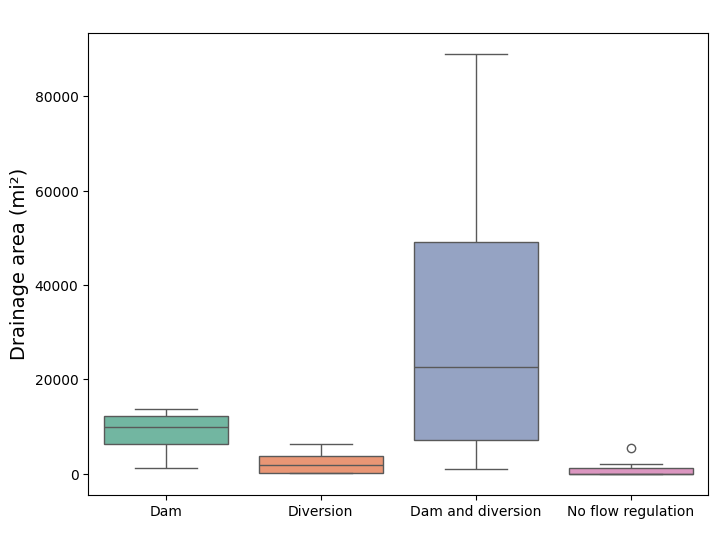

In [74]:


# Create the grouped boxplot
plt.figure(figsize=(8, 6))  # Set the figure size
sns.boxplot(x="dam_and_diversion", y="drain_area_va", data=filtered_df, palette="Set2")

# Add labels and title
plt.title(" ", fontsize=14)
plt.xlabel(" ", fontsize=12)
plt.ylabel("Drainage area (mi\u00B2)", fontsize=14)

# Save the plot to a local file
plt.savefig("boxplot_drain_area.png"
           # , dpi=300, bbox_inches="tight"
           )

# Display the plot
plt.show()


<ipython-input-75-1253158677>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="dam_and_diversion", y="alt_va", data=filtered_df, palette="Set2")


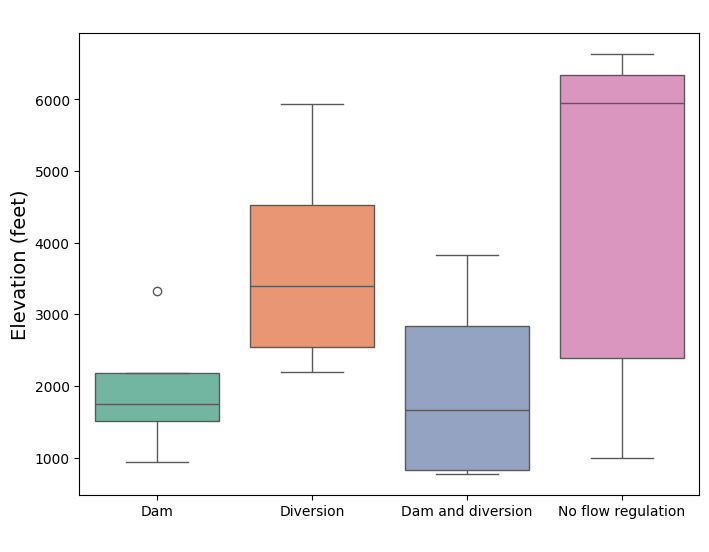

In [75]:
# Create the grouped boxplot
plt.figure(figsize=(8, 6))  # Set the figure size
sns.boxplot(x="dam_and_diversion", y="alt_va", data=filtered_df, palette="Set2")

# Add labels and title
plt.title(" ", fontsize=14)
plt.xlabel(" ", fontsize=12)
plt.ylabel("Elevation (feet)", fontsize= 14)

plt.savefig("boxplot_Elevation.png"
           # , dpi=300, bbox_inches="tight"
           )

plt.show()

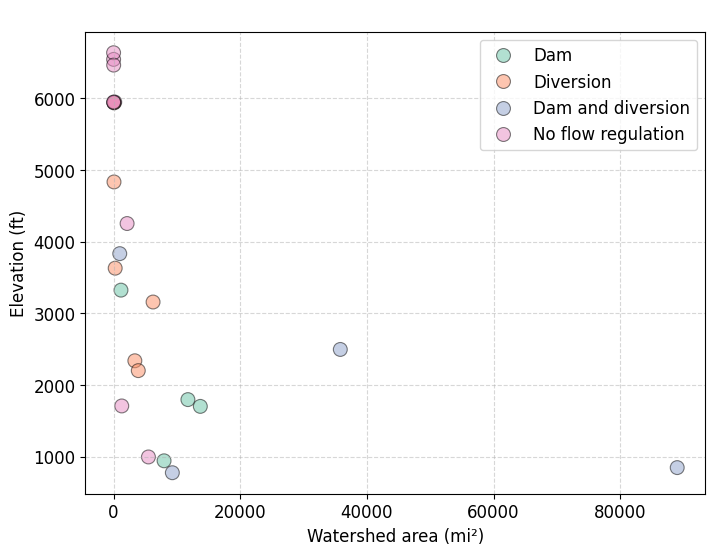

In [76]:
xlabel = "Watershed area (mi\u00B2)"
ylabel = "Elevation (ft)"
fontsize = 12

# Create scatter plot
plt.figure(figsize=(8, 6))  # Set figure size
sns.scatterplot(
    y="alt_va",
    x="drain_area_va",
    hue="dam_and_diversion",  # Fill color based on 'dam_and_diversion'
    data=filtered_df,
    palette="Set2"  # Custom color palette
    , alpha = 0.5,
    s=100,  # Marker size
    edgecolor="black"  # Add an edge color to markers
)

# Add labels and title
plt.title(" ", fontsize= fontsize)
plt.ylabel( ylabel , fontsize= fontsize)
plt.xlabel( xlabel , fontsize= fontsize)

plt.xticks(   fontsize= fontsize)
plt.yticks(   fontsize= fontsize)

# Display legend
plt.legend(  fontsize= fontsize)

plt.grid(True, linestyle="--", alpha=0.5)

plt.savefig("flow_reg_alt_drain.png")

plt.show()


In [77]:



filtered_df['drain_area_km2'] =  filtered_df['drain_area_va'] * (1.60934 ** 2)
filtered_df['alt_m'] =  filtered_df['alt_va'] * 0.3048
filtered_df

<ipython-input-77-2412766028>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['drain_area_km2'] =  filtered_df['drain_area_va'] * (1.60934 ** 2)
<ipython-input-77-2412766028>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['alt_m'] =  filtered_df['alt_va'] * 0.3048


,site_no,dec_lat_va,dec_long_va,drain_area_va,alt_va,dam_regulation,upstream_diversion,comment,elevation,dike_regulation,dam,diversion,dam_and_diversion,drain_area_km2,alt_m
0,12305000,48.616883,-116.049194,11740.0,1794.75000,"Libby Dam and power plant, located about 50.5 ...",NaN,NaN,1840.55124,NaN,Dam,No diversion,Dam,30406.309266,547.039800
1,12322000,48.996389,-116.507500,13700.0,1700.00000,Kootenay Lake and Libby Dam,NaN,NaN,1748.68772,Boundary dike of Reclamation Farm and U.S. For...,Dam,No diversion,Dam,35482.660728,518.160000
2,13092747,42.562500,-114.494722,259.0,3630.00000,NaN,Flow partially regulated by many diversions up...,NaN,3628.60904,NaN,No dam,Diversion,Diversion,670.803586,1106.424000
3,13150430,43.323361,-114.108350,70.0,4834.45000,NaN,Irrigation,NaN,4849.08152,NaN,No dam,Diversion,Diversion,181.298266,1473.540360
4,13154500,43.002222,-115.202500,35800.0,2495.13000,American Falls Reservoir,irrigation diversions at Milner Dam,"springs and seepage entering below Milner, irr...",2513.12344,NaN,Dam,Diversion,Dam and diversion,92721.113434,760.515624
5,13176400,42.261369,-116.868442,2140.0,4253.65000,NaN,NaN,no USGS remark,4294.61956,NaN,No dam,No diversion,No flow regulation,5542.547004,1296.512520
6,13190500,43.343611,-115.477500,978.0,3833.07000,Anderson Ranch Reservoir,diverted out of basin through Little Camas Can...,NaN,3877.95288,NaN,Dam,Diversion,Dam and diversion,2532.995780,1168.319736
7,13192200,43.550556,-115.721944,1172.0,3323.49092,Anderson Ranch Reservior,NaN,NaN,3323.49092,NaN,Dam,No diversion,Dam,3035.450976,1013.000032
8,13211205,43.677353,-116.701131,3363.0,2337.11000,NaN,Many canals and small farm laterals divert wat...,NaN,2345.80060,NaN,No dam,Diversion,Diversion,8710.086717,712.351128
9,13213000,43.781667,-116.972778,3906.0,2199.46000,NaN,Many canals and small farm laterals divert wat...,NaN,2211.28616,NaN,No dam,Diversion,Diversion,10116.443270,670.395408


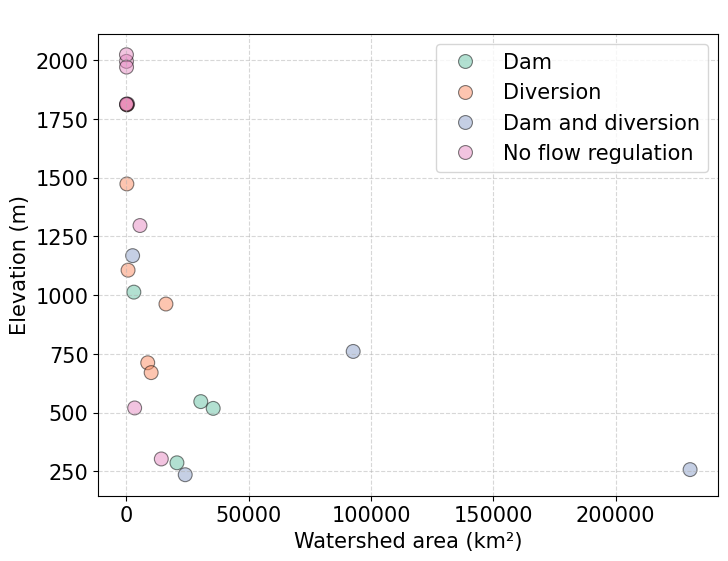

In [78]:
xlabel = "Watershed area (km\u00B2)"
ylabel = "Elevation (m)"
fontsize = 15

# Create scatter plot
plt.figure(figsize=(8, 6))  # Set figure size
sns.scatterplot(
    y="alt_m",
    x="drain_area_km2",
    hue="dam_and_diversion",  # Fill color based on 'dam_and_diversion'
    data=filtered_df,
    palette="Set2"  # Custom color palette
    , alpha = 0.5,
    s=100,  # Marker size
    edgecolor="black"  # Add an edge color to markers
)

# Add labels and title
plt.title(" ", fontsize= fontsize)
plt.ylabel( ylabel , fontsize= fontsize)
plt.xlabel( xlabel , fontsize= fontsize)

plt.xticks(   fontsize= fontsize)
plt.yticks(   fontsize= fontsize)

# Display legend
plt.legend(  fontsize= fontsize)

plt.grid(True, linestyle="--", alpha=0.5)

plt.savefig("flow_reg_alt_drain_km2.png")

plt.show()

In [79]:
#filtered_df[ ['site_no', 'dec_lat_va', 'dec_long_va', 'drain_area_va', 'alt_va'
             # ,'comment'
            #,"dike_regulation",	"dam",	"diversion"	,"dam_and_diversion"

          #   ] ].to_csv(ws_charateristics_csv)




filtered_df[ ['site_no', 'dec_lat_va', 'dec_long_va', 'drain_area_va', 'alt_va'
      # 'dam_regulation', 'upstream_diversion', 'dike_regulation'
              ,'comment'
             ,"dike_regulation",	"dam",	"diversion"	,"dam_and_diversion"

             ] ].to_csv('/content/drive/My Drive/' 'ws_charateristics_'+   current_time.strftime("%Y%m%d%H%M") + '.csv' , index=False)

